In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")

In [2]:
with open("./data/output.json") as f:
    data = json.load(f)

In [3]:
total = len(data)
print("Users who have received airdrop:", total)

active = 0; [active := active + 1 for user in data if user["sequence"] > 0]
print("Users who have sent at least one tx:", active)

staking = 0; [staking := staking + 1 for user in data if user["staked_amount"] > 0]
print("Users who is staking a non-zero amount:", staking)

Users who have received airdrop: 23896
Users who have sent at least one tx: 3333
Users who is staking a non-zero amount: 1648


In [4]:
import math

active_tokens = 0
[active_tokens := active_tokens + user["airdrop_amount"] for user in data if user["sequence"] > 0]
print("Tokens corresponding active users:", math.floor(active_tokens / 1e6))

inactive_tokens = 0
[inactive_tokens := inactive_tokens + user["airdrop_amount"] for user in data if user["sequence"] == 0]
print("Tokens corresponding inactive users:", math.floor(inactive_tokens / 1e6))

Tokens corresponding active users: 32005255
Tokens corresponding inactive users: 34245218


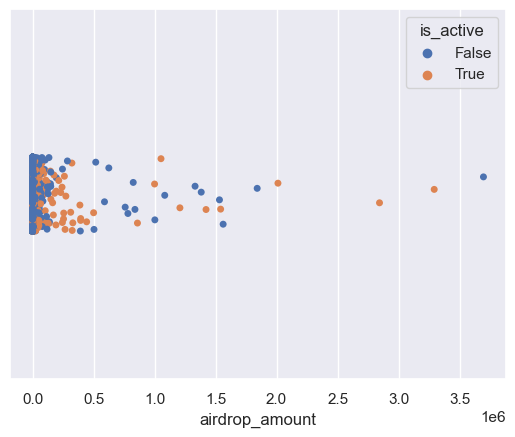

In [5]:
activity_data = pd.DataFrame([
    {
        "airdrop_amount": user["airdrop_amount"] / 1e6,
        "is_active": user["sequence"] > 0,
    }
    for user in data
])

g = sns.stripplot(data=activity_data, x="airdrop_amount", hue="is_active")

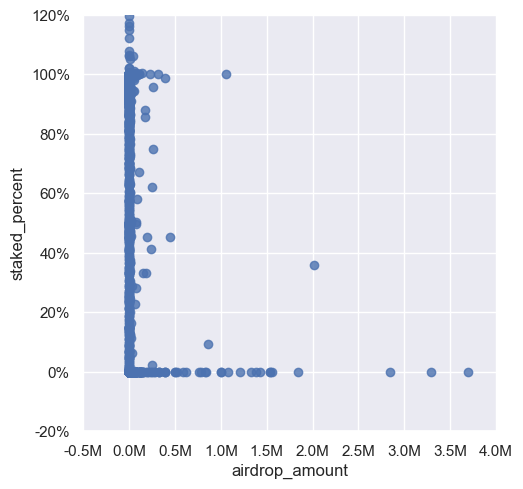

In [6]:
staked_percentage = pd.DataFrame([
    {
        "staked_percent": user["staked_amount"] / user["airdrop_amount"],
        "airdrop_amount": user["airdrop_amount"] / 1e6,
    }
    for user in data
])

g = sns.lmplot(data=staked_percentage, x="airdrop_amount", y="staked_percent", fit_reg=False, ci=None)
g.set(xlim=(-0.05, 4e6), ylim=(-0.05, 1.05))
g.set_xticklabels(["{:,.1f}".format(x / 1e6) + "M" for x in g.ax.get_xticks()])
g.set_yticklabels("{:d}".format(int(y * 100)) + "%" for y in g.ax.get_yticks())

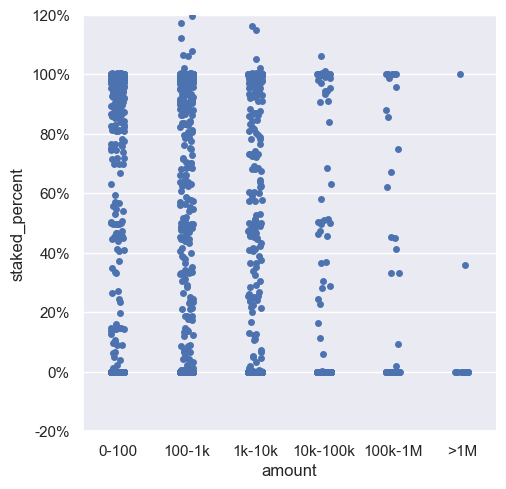

In [7]:
staked_percentage_box = pd.DataFrame([
    {
        "amount": "0-100" if user["airdrop_amount"] <= 100e6 else
                  "100-1k" if user["airdrop_amount"] <= 1_000e6 else
                  "1k-10k" if user["airdrop_amount"] <= 10_000e6 else
                  "10k-100k" if user["airdrop_amount"] <= 100_000e6 else
                  "100k-1M" if user["airdrop_amount"] <= 1_000_000e6 else
                  ">1M",
        "staked_percent": user["staked_amount"] / user["airdrop_amount"],
    }
    for user in data
])

g = sns.catplot(
    data=staked_percentage_box,
    x="amount",
    y="staked_percent",
    order=["0-100", "100-1k", "1k-10k", "10k-100k", "100k-1M", ">1M"],
)
g.set(ylim=(-0.05, 1.05))
g.set_yticklabels("{:d}".format(int(y * 100)) + "%" for y in g.ax.get_yticks())